In [82]:
import numpy as np
np.random.seed(0)

#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

### Wczytanie danych

In [85]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


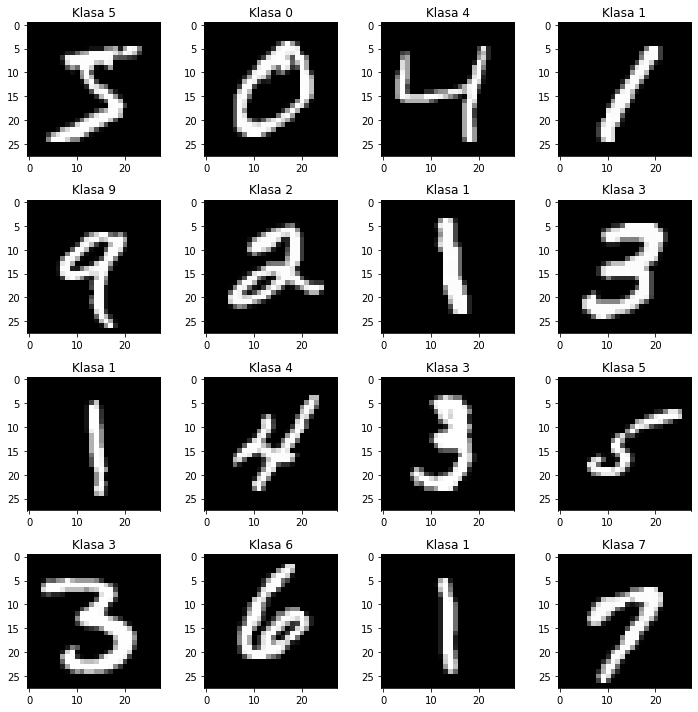

In [86]:
fig = plt.figure(figsize=(10, 10))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_train[idx], cmap='gray', interpolation='none')
    plt.title("Klasa {}".format(y_train[idx]))
    
plt.tight_layout()

In [4]:
if len(X_train.shape) == 3:
    num_pixels = X_train.shape[1] * X_train.shape[2]
    X_train = X_train.reshape( X_train.shape[0], num_pixels ).astype("float32")
    X_test = X_test.reshape( X_test.shape[0], num_pixels ).astype("float32")

print(X_train.shape, X_test.shape)

if np.max(X_train) > 1: X_train /= 255
if np.max(X_test) > 1: X_test /= 255

(60000, 784) (10000, 784)


In [6]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [81]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
num_classes

10

In [8]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train,
                    batch_size=512, epochs=10, verbose=2,
                    validation_data=(X_test, y_test))

2021-12-15 14:37:08.787763: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
118/118 - 1s - loss: 0.4099 - accuracy: 0.8878 - val_loss: 0.2062 - val_accuracy: 0.9417 - 1s/epoch - 11ms/step
Epoch 2/10
118/118 - 1s - loss: 0.1768 - accuracy: 0.9500 - val_loss: 0.1462 - val_accuracy: 0.9561 - 927ms/epoch - 8ms/step
Epoch 3/10
118/118 - 1s - loss: 0.1262 - accuracy: 0.9646 - val_loss: 0.1154 - val_accuracy: 0.9663 - 1s/epoch - 8ms/step
Epoch 4/10
118/118 - 1s - loss: 0.0954 - accuracy: 0.9732 - val_loss: 0.0954 - val_accuracy: 0.9723 - 883ms/epoch - 7ms/step
Epoch 5/10
118/118 - 1s - loss: 0.0757 - accuracy: 0.9787 - val_loss: 0.0881 - val_accuracy: 0.9740 - 827ms/epoch - 7ms/step
Epoch 6/10
118/118 - 1s - loss: 0.0615 - accuracy: 0.9831 - val_loss: 0.0814 - val_accuracy: 0.9752 - 879ms/epoch - 7ms/step
Epoch 7/10
118/118 - 1s - loss: 0.0505 - accuracy: 0.9866 - val_loss: 0.0745 - val_accuracy: 0.9773 - 893ms/epoch - 8ms/step
Epoch 8/10
118/118 - 1s - loss: 0.0423 - accuracy: 0.9887 - val_loss: 0.0726 - val_accuracy: 0.9787 - 886ms/epoch - 8ms/step
Epoch

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.07221608608961105
Test accuracy: 0.9771999716758728
MLP Error: 2.28%


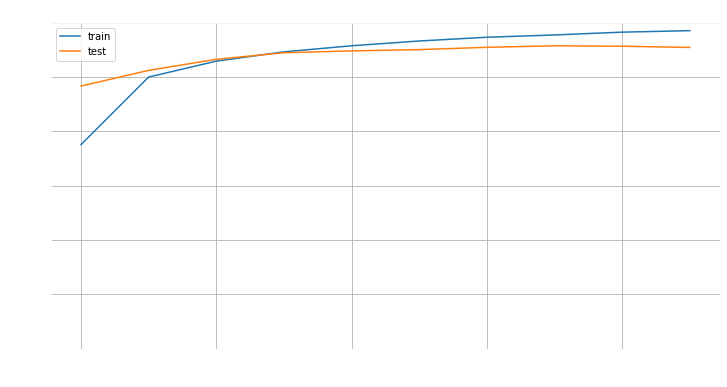

In [20]:
def draw_learning_curve(history, key='accuracy', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    
    plt.plot( history.history[key] )
    plt.plot( history.history['val_' + key] )
    
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
    plt.grid()
    ax = plt.gca()
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.show()
    
draw_learning_curve(history, 'accuracy', ylim=(0.7, 1.))

In [25]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X_train, y_train,
          batch_size=1024, epochs=10, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/10
59/59 - 1s - loss: 0.0211 - accuracy: 0.9948 - val_loss: 0.0669 - val_accuracy: 0.9800 - 1s/epoch - 17ms/step
Epoch 2/10
59/59 - 1s - loss: 0.0176 - accuracy: 0.9957 - val_loss: 0.0656 - val_accuracy: 0.9805 - 1s/epoch - 18ms/step
Epoch 3/10
59/59 - 1s - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0690 - val_accuracy: 0.9795 - 1s/epoch - 18ms/step
Epoch 4/10
59/59 - 1s - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.0670 - val_accuracy: 0.9811 - 954ms/epoch - 16ms/step
Epoch 5/10
59/59 - 1s - loss: 0.0091 - accuracy: 0.9985 - val_loss: 0.0692 - val_accuracy: 0.9796 - 955ms/epoch - 16ms/step
Epoch 6/10
59/59 - 1s - loss: 0.0067 - accuracy: 0.9991 - val_loss: 0.0690 - val_accuracy: 0.9802 - 1s/epoch - 18ms/step
Epoch 7/10
59/59 - 1s - loss: 0.0056 - accuracy: 0.9995 - val_loss: 0.0659 - val_accuracy: 0.9820 - 1s/epoch - 17ms/step
Epoch 8/10
59/59 - 1s - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.0709 - val_accuracy: 0.9807 - 1s/epoch - 19ms/step
Epoch 9/10
59/59 - 1s - lo

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.06909455358982086
Test accuracy: 0.9819999933242798
MLP Error: 1.80%


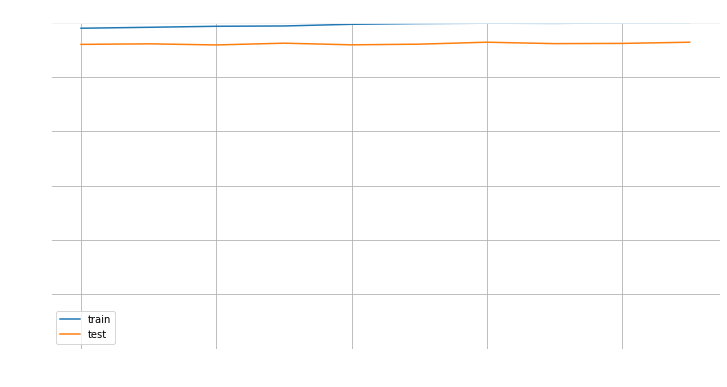

In [31]:
draw_learning_curve(history, 'accuracy', ylim=(0.7, 1.))

In [37]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dropout(0.5), 
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train,
          batch_size=1024, epochs=5, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/5
59/59 - 1s - loss: 0.0444 - accuracy: 0.9855 - val_loss: 0.0576 - val_accuracy: 0.9821 - 1s/epoch - 21ms/step
Epoch 2/5
59/59 - 1s - loss: 0.0416 - accuracy: 0.9863 - val_loss: 0.0568 - val_accuracy: 0.9825 - 1s/epoch - 20ms/step
Epoch 3/5
59/59 - 1s - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0547 - val_accuracy: 0.9830 - 1s/epoch - 21ms/step
Epoch 4/5
59/59 - 1s - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0588 - val_accuracy: 0.9829 - 1s/epoch - 20ms/step
Epoch 5/5
59/59 - 1s - loss: 0.0373 - accuracy: 0.9875 - val_loss: 0.0565 - val_accuracy: 0.9827 - 1s/epoch - 20ms/step


In [45]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.05647347494959831
Test accuracy: 0.982699990272522
MLP Error: 1.73%


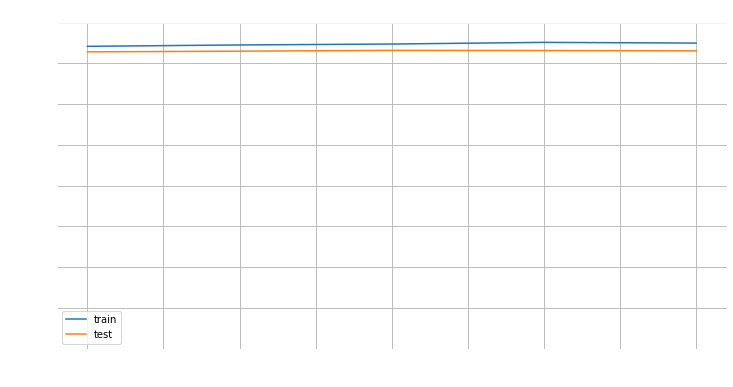

In [46]:
draw_learning_curve(history, 'accuracy', ylim=(0.8, 1.))

In [48]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dropout(0.5), 
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 10)               

In [61]:
history = model.fit(X_train, y_train,
          batch_size=1024, epochs=5, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/5
59/59 - 1s - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0601 - val_accuracy: 0.9824 - 1s/epoch - 22ms/step
Epoch 2/5
59/59 - 1s - loss: 0.0359 - accuracy: 0.9881 - val_loss: 0.0602 - val_accuracy: 0.9835 - 1s/epoch - 21ms/step
Epoch 3/5
59/59 - 1s - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.0647 - val_accuracy: 0.9825 - 1s/epoch - 24ms/step
Epoch 4/5
59/59 - 1s - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.0603 - val_accuracy: 0.9839 - 1s/epoch - 25ms/step
Epoch 5/5
59/59 - 1s - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0634 - val_accuracy: 0.9834 - 1s/epoch - 23ms/step


In [62]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.06340329349040985
Test accuracy: 0.9833999872207642
MLP Error: 1.66%


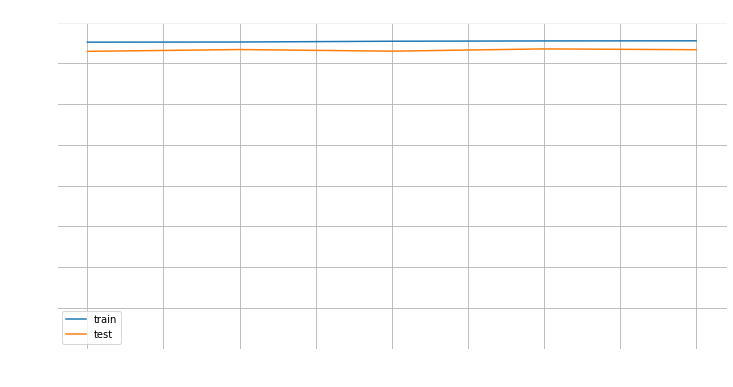

In [63]:
draw_learning_curve(history, 'accuracy', ylim=(0.8, 1.))

In [71]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dropout(0.5), 
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = model.fit(X_train, y_train,
          batch_size=512, epochs=5, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/5
118/118 - 2s - loss: 0.0495 - accuracy: 0.9841 - val_loss: 0.0580 - val_accuracy: 0.9821 - 2s/epoch - 15ms/step
Epoch 2/5
118/118 - 2s - loss: 0.0458 - accuracy: 0.9847 - val_loss: 0.0567 - val_accuracy: 0.9832 - 2s/epoch - 15ms/step
Epoch 3/5
118/118 - 2s - loss: 0.0417 - accuracy: 0.9858 - val_loss: 0.0585 - val_accuracy: 0.9827 - 2s/epoch - 14ms/step
Epoch 4/5
118/118 - 2s - loss: 0.0418 - accuracy: 0.9857 - val_loss: 0.0584 - val_accuracy: 0.9831 - 2s/epoch - 17ms/step
Epoch 5/5
118/118 - 2s - loss: 0.0374 - accuracy: 0.9874 - val_loss: 0.0567 - val_accuracy: 0.9837 - 2s/epoch - 17ms/step


In [76]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.06330298632383347
Test accuracy: 0.9803000092506409
MLP Error: 1.97%


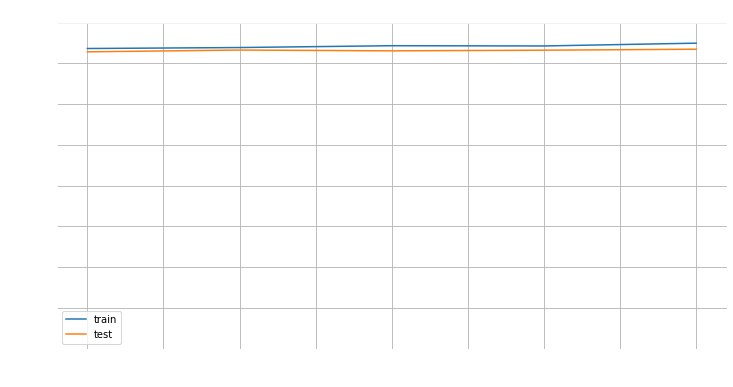

In [79]:
draw_learning_curve(history, 'accuracy', ylim=(0.8, 1.))